In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

plt.style.use("default")

In [2]:
dataset = "CIFAR_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined = pkl.load(f)

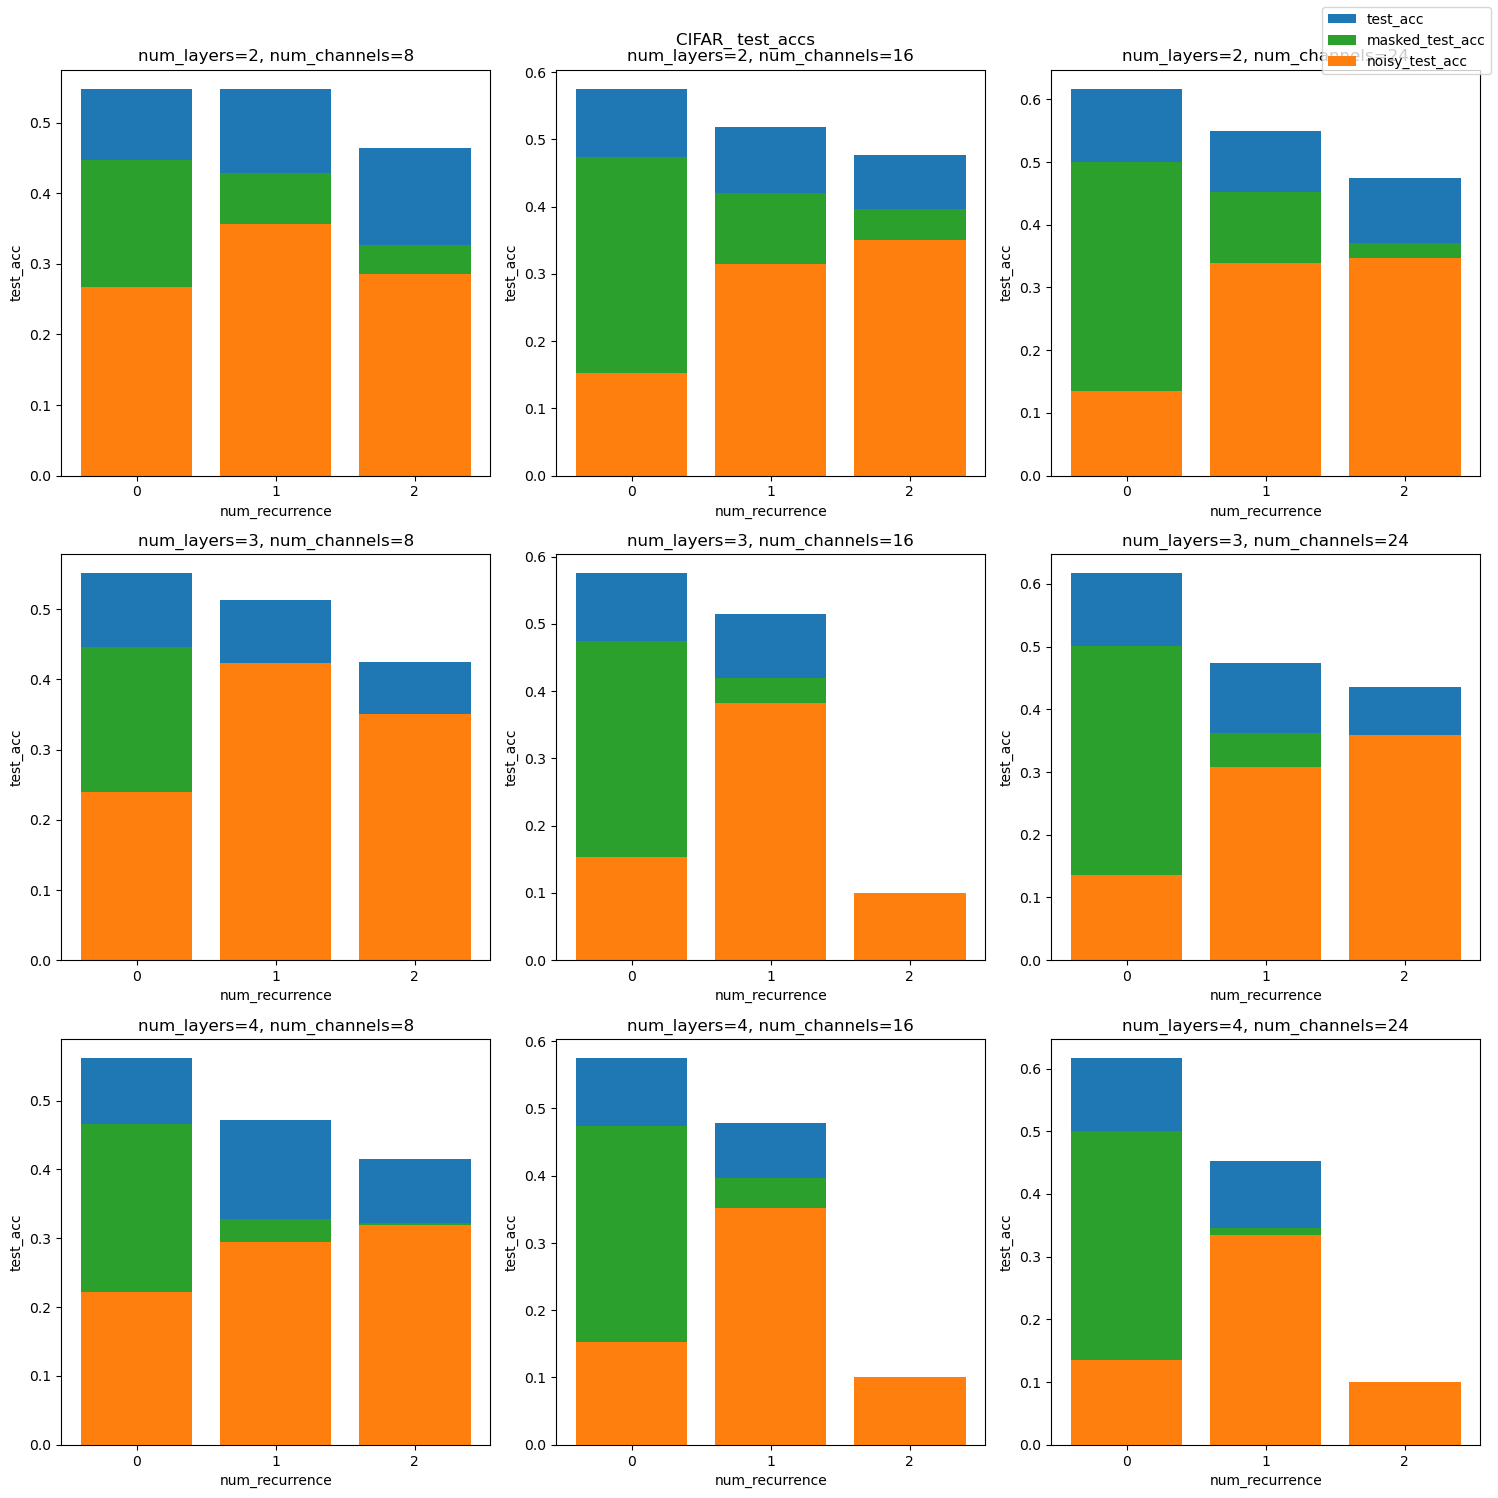

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for num_layers in range(3):
    for num_channels in range(3):
        # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
        ax = axes[num_layers, num_channels]
        ax.set_title(
            f"num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}"
        )
        ax.set_xlabel("num_recurrence")
        ax.set_ylabel("test_acc")
        ax.bar(
            np.arange(3),
            combined["test_accs"][num_layers, :, num_channels],
            label="test_acc",
        )
        ax.bar(
            np.arange(3),
            combined["masked_test_accs"][num_layers, :, num_channels],
            label="masked_test_acc",
            color="tab:green",
        )
        ax.bar(
            np.arange(3),
            combined["noisy_test_accs"][num_layers, :, num_channels],
            label="noisy_test_acc",
            color="tab:orange",
        )

        ax.set_xticks(np.arange(3))
fig.suptitle(f"{dataset} test_accs")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
fig.savefig(f"{dataset}accuracy.png")